## Prepare a prediction model for profit of 50_startups data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Performing  EDA on Dataset

In [3]:
data.shape

(50, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data = data.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MS'}, axis =1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADM     50 non-null     float64
 2   MS      50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<AxesSubplot:>

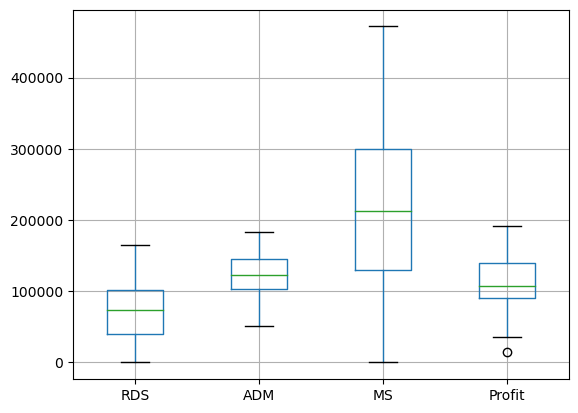

In [7]:
data.boxplot()

### Building Model

In [8]:
import statsmodels.formula.api as smf

In [9]:
model = smf.ols('Profit~RDS+ADM+MS', data=data).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        11:37:40   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Simple Linear Regression

In [11]:
ml_ad = smf.ols('Profit~ADM', data = data).fit()

In [12]:
print(ml_ad.tvalues,'\n',ml_ad.pvalues)

Intercept    3.040044
ADM          1.419493
dtype: float64 
 Intercept    0.003824
ADM          0.162217
dtype: float64


In [13]:
ml_ms = smf.ols('Profit~MS' , data = data).fit()

In [14]:
print(ml_ms.tvalues,'\n',ml_ms.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [15]:
ml_msad = smf.ols('Profit~ADM+MS', data = data).fit()

In [16]:
print(ml_msad.tvalues,'\n',ml_msad.pvalues)

Intercept    1.142741
ADM          2.467779
MS           8.281039
dtype: float64 
 Intercept    2.589341e-01
ADM          1.729198e-02
MS           9.727245e-11
dtype: float64


In [17]:
cor = data.corr()
cor

,RDS,ADM,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


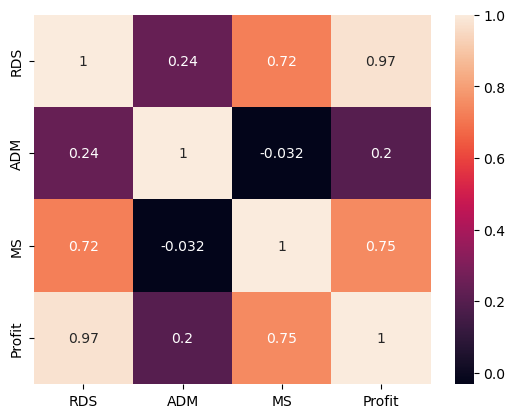

In [18]:
sns.heatmap(cor,annot = True)
plt.show()

In [19]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_rds = smf.ols('RDS~ADM+MS',data =data).fit().rsquared
vif_rds = 1/(1-rsq_rds)

rsq_adm = smf.ols('ADM~RDS+MS',data = data).fit().rsquared
vif_adm = 1/(1-rsq_adm)

rsq_ms = smf.ols('MS~RDS+ADM', data = data).fit().rsquared
vif_ms = 1/(1-rsq_ms)

#Putting the values in dataframe

d1 = {'Variables':['RDS','ADM','MS'],'Vif':[vif_rds,vif_adm,vif_ms]}
vif_d1 = pd.DataFrame(d1)
vif_d1

,Variables,Vif
0,RDS,2.468903
1,ADM,1.175091
2,MS,2.326773


### None variable has VIF>10, No Collinearity, so consider all varaibles in Regression equation

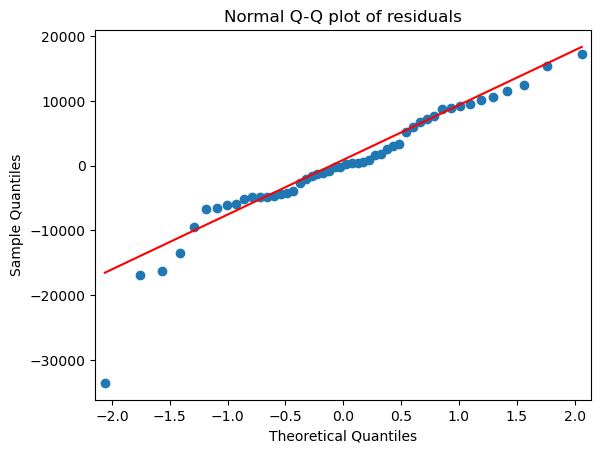

In [20]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
import statsmodels.api as sm

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Residual Plot for Homoscedasticity

In [21]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

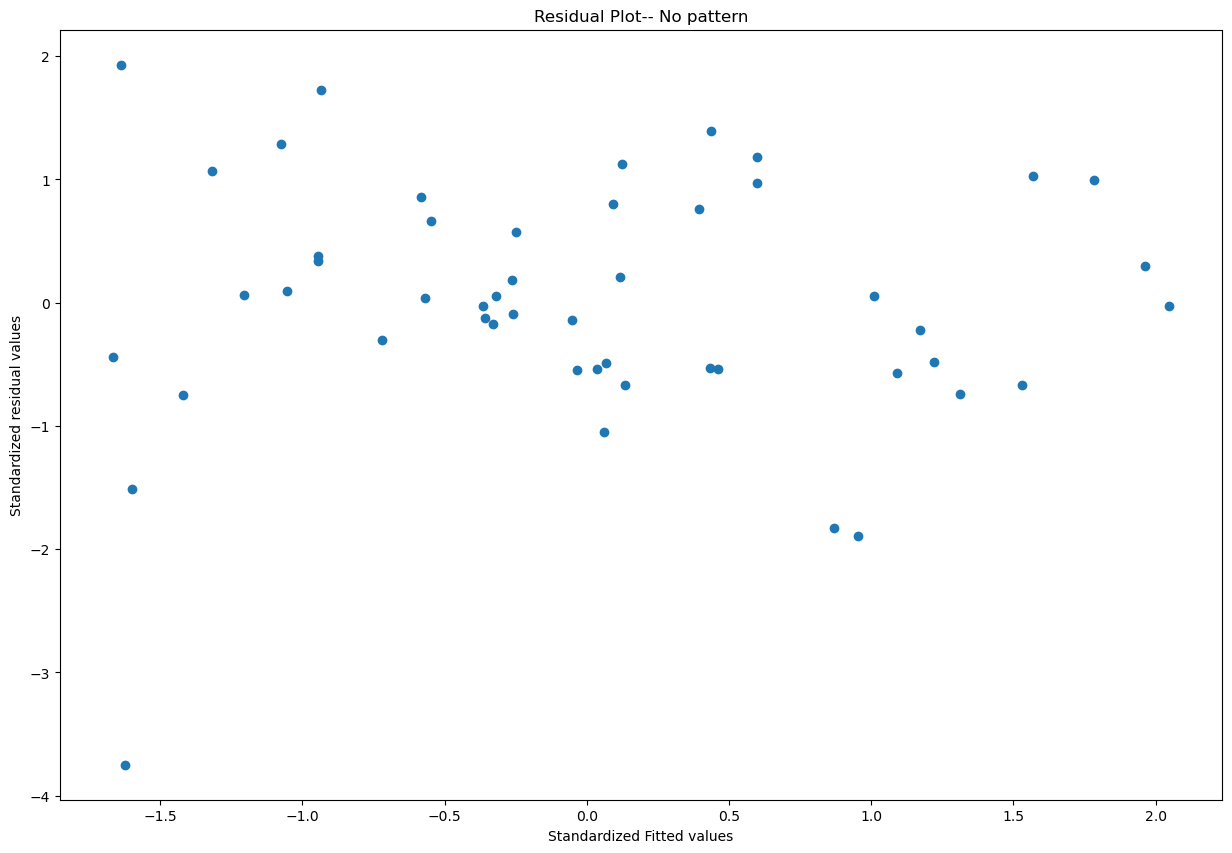

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot-- No pattern')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Model Deletion Diagnostics (checking Outliers or Influencers)

In [23]:
from statsmodels.graphics.regressionplots import influence_plot

In [24]:
model_infulence=model.get_influence()
(c,_)=model_infulence.cooks_distance

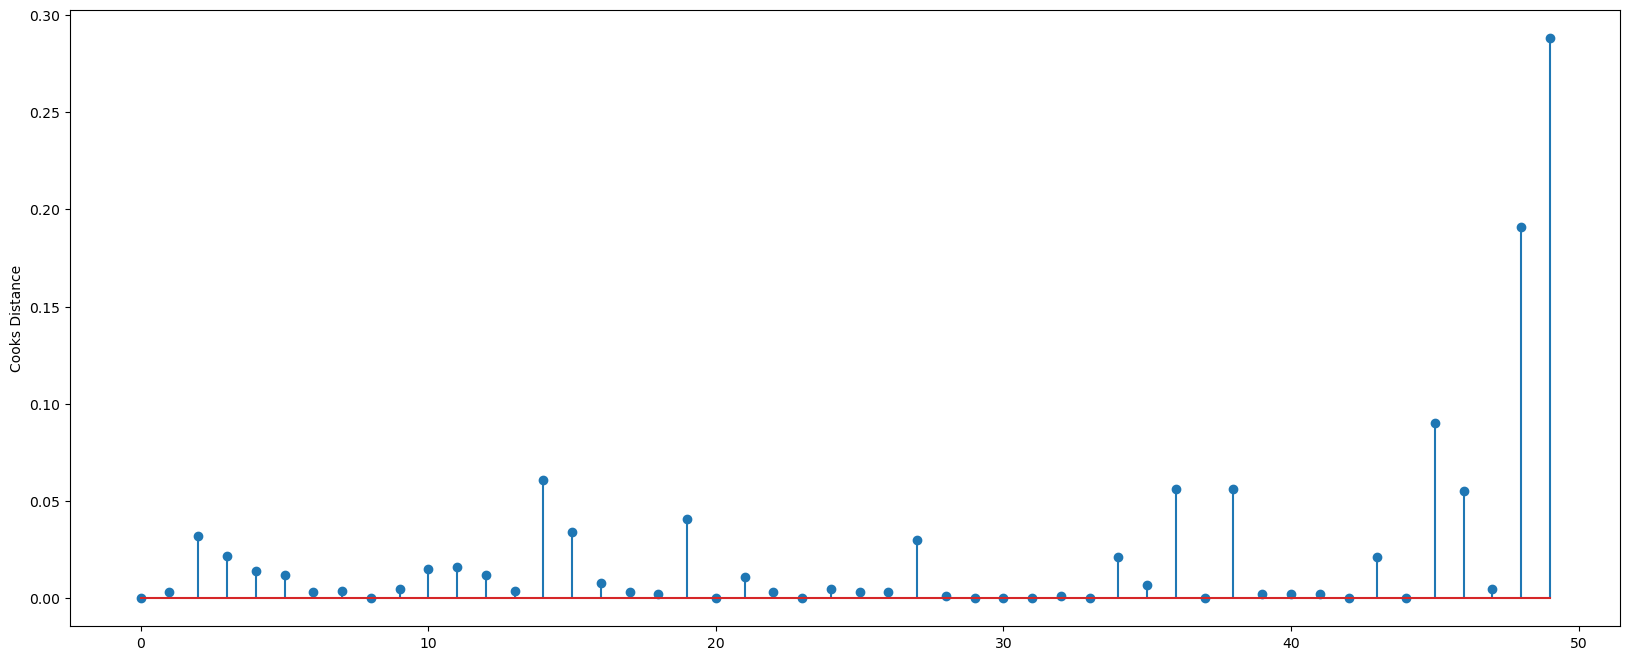

In [25]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.ylabel('Cooks Distance')
plt.show()

eval_env: 1


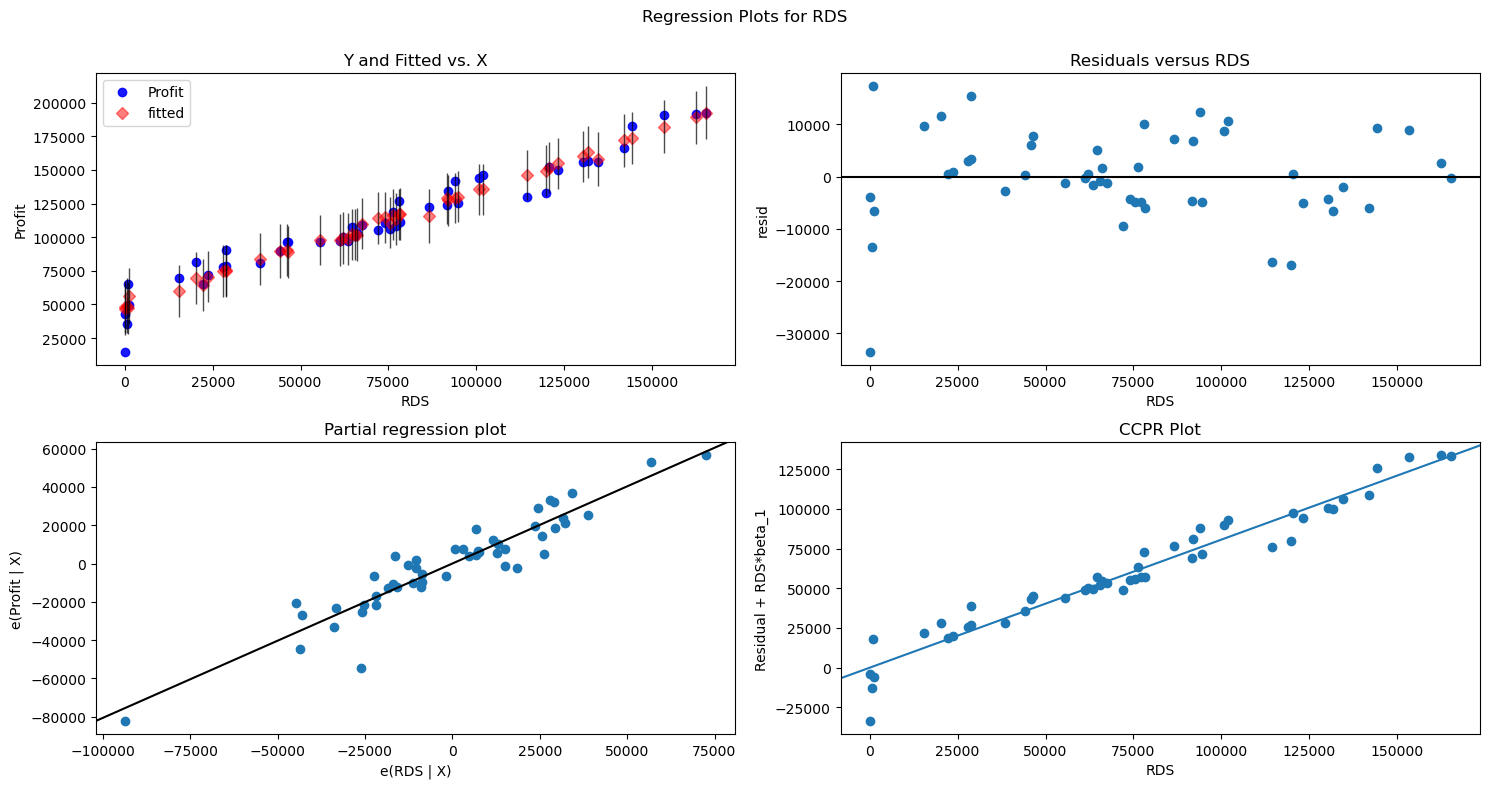

In [26]:
## CCPR - component plus residual plot
# A component residual plot adds a line indicating where the line of best fit lies. 
# A significant difference between the residual line and the component line 
# indicates that the predictor does not have a linear relationship with the dependent variable.

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


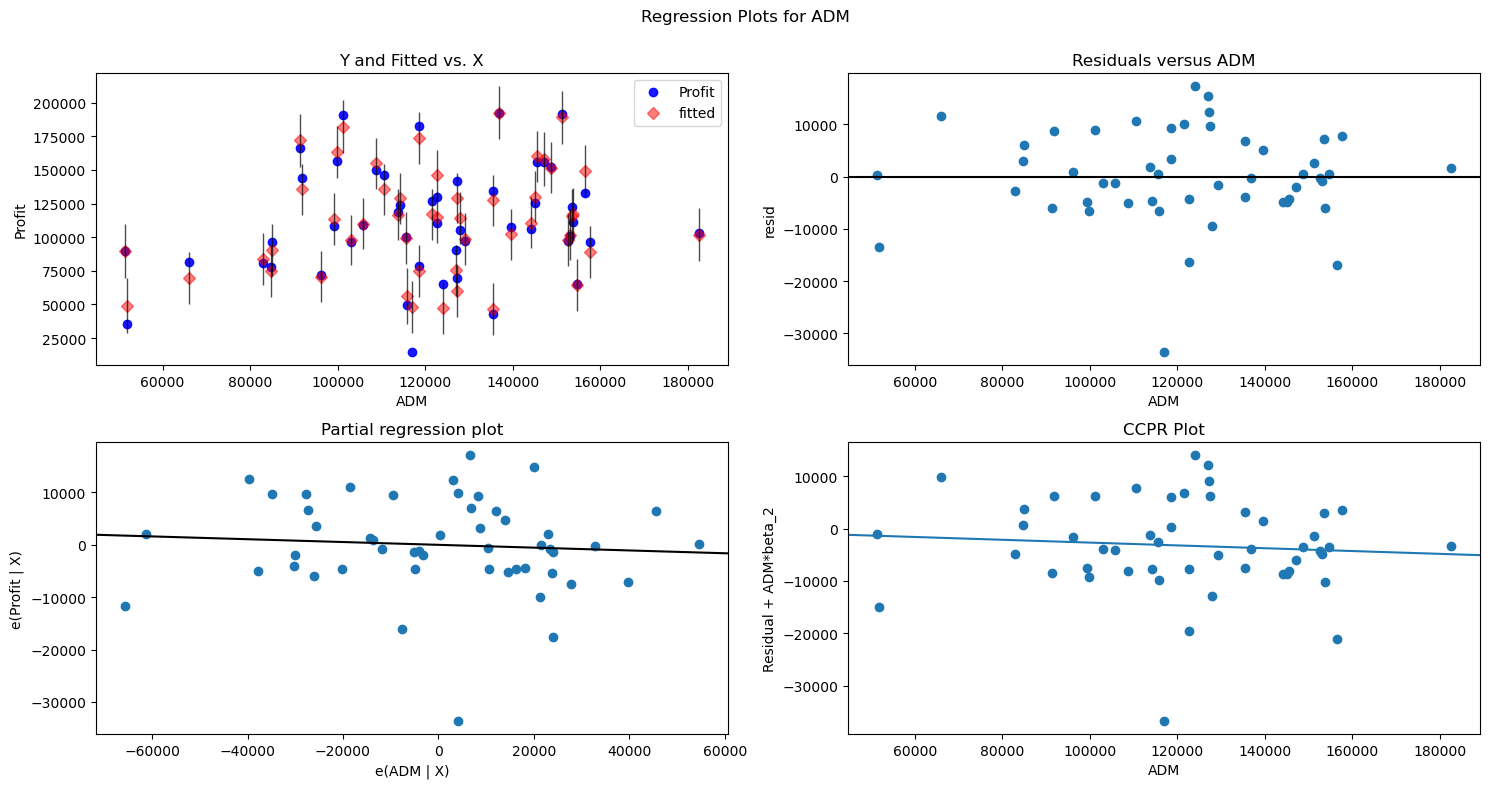

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADM',fig=fig)
plt.show()

eval_env: 1


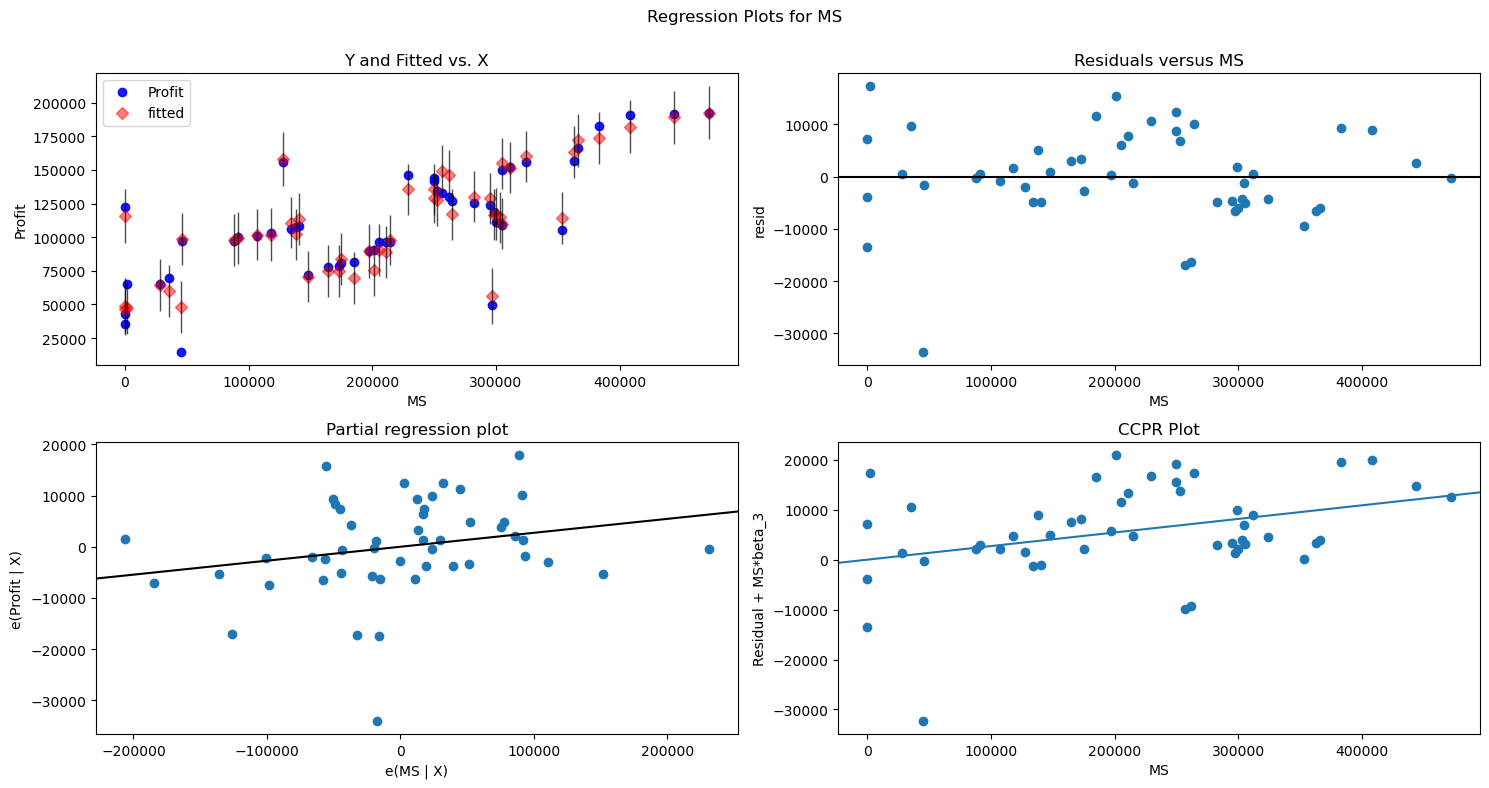

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

In [29]:
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

### Since the value is <1, we can stop the diagnostic process and finalize the model

### Improving the Model

In [30]:
data1=data.drop(data.index[49],axis=0).reset_index(drop=True)
data1

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [31]:
final_model=smf.ols('Profit~RDS+ADM+MS',data=data1).fit()

In [32]:
print(final_model.rsquared,final_model.aic)

0.9613162435129847 1020.5652974526367


### Saving the model

In [33]:
pickle.dump(final_model, open('Q1_model.pkl', 'wb'))

### Predicting new values

In [34]:
new_data=pd.DataFrame({'RDS':90000,"ADM":80000,"MS":150000},index=[0])
new_data

,RDS,ADM,MS
0,90000,80000,150000


In [35]:
final_model.predict(new_data)

0    124861.542078
dtype: float64

In [36]:
pred_Profit=final_model.predict(data1)

In [37]:
pred_Profit

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

### Table containing R^2 value for each prepared model

In [38]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
